# Examen Python data developer
# Deel 1
## Introductie
Voor dit examen is het belangrijk dat je volgende zaken zeker doet:
 - Maak een Vitual Environment aan & exporteer een `.yml` (of soortgelijke) file aan die je toevoegt aan je codebase.
 - Maak een github pagina aan met een bijhorende `.gitignore` en `readme.md`. Voeg een link naar de github repo toe aan je readme file.
 - Zorg dat je op het einde de tijd neemt om je code op te schonen zodat deze begrijpelijk is voor derden.
 - Wanneer je klaar bent, maak een `.zip` bestand van je volledige codebase aan en laad deze op in de leeromgeving.

In deze opgave bekijken we een gesimuleerde dataset over de geboortes in België van 2019. De data is te vinden in `.csv` bestanden die gelabeld zijn met de echte geboortedag van de personen in het bestand. Laat ons bijvoorbeeld even kijken naar de eerste 5 lijnen van het bestand `2019-1-1.csv`:

<table align="center">
  <tr>
    <th>gemeente</th>
    <th>naam</th>
    <th>geslacht</th>
    <th>verwachte datum</th>
  </tr>
  <tr>
    <td>Hooglede</td>
    <td>Elias</td>
    <td>Mannelijk</td>
    <td>01/14/2019</td>
  </tr>
  <tr>
    <td>Sint-Niklaas (Sint-Niklaas)</td>
    <td>Pauline</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Wijnegem</td>
    <td>Anita</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Grâce-Hollogne</td>
    <td>Jean-Paul</td>
    <td>Mannelijk</td>
    <td>01/13/2019</td>
  </tr>
  <tr>
    <td>Boussu</td>
    <td>François</td>
    <td>Mannelijk</td>
    <td>01/26/2019</td>
  </tr>
</table>


Hier hebben we de kolommen:
 - **gemeente**: De gemeente waar de persoon geboren is.
 - **naam**: De voornaam van de persoon.
 - **geslacht**: Het geslacht van de persoon (Mannelijk of Vrouwelijk).
 - **verwachte datum**: De verwachte geboortedatum van de persoon.

Dus hier hebben we dan bijvoorbeeld op de eerste lijn de mannelijke persoon Elias die geboren is in Hooglede waarvan men verwachtte dat hij zou geboren worden op `01/14/2019` (Amerikaans formaat) maar in feite geboren is op 1 januari 2019.

Doorheen deze opgave gaan we de data van dichterbij inspecteren! Je kan deze opgaves alternatief lezen in de bijgeleverde notebook `examen.ipynb` waar ook de (meeste) afbeeldingen & resultaten zichtbaar zijn.

In [1]:
# Import packages
import pandas as pd 
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import numpy as np 


# Definieer data locaties
INPUT_FOLDER = os.path.join("data")

## Utilities

In [2]:
def to_percentage(number):
    return str(np.round(number * 100, 2)) + "%"

def compute_num_unique(df, n_births):
    return len(np.unique(df['naam'].sample(n_births)))

## Stap 1: data inlezen

Maak een lus over alle bestanden in de map `data/geboortes`, lees elk `.csv` bestand in en voeg deze samen tot 1 grote DataFrame. Merk op dat de datum verwerkt zit in de filename, voeg deze toe aan de kleine DataFrames voor je de dataframes samenvoegt met een `pd.concat(dfs)`.

Voeg een extra kolom toe met een `"dag van het jaar"` getal, dus 1 januari 2019 is `1`, 2 januari 2019 is `2`, enzovoort.

**Opmerking**: Er is ook data voor 29 februari 2019, terwijl dit geen schrikkeljaar is! Plaats deze geboortes in een afzonderlijke DataFrame `df_wrong`. Zet in `df_wrong` een extra kolom met een referentie naar waarom deze data foutief is.

In [3]:
# Initialize an empty list to store the DataFrames
df_list = []
df_list_wrong = []

# Loop through each file in the folder
for filename in os.listdir(INPUT_FOLDER):
    if filename.endswith('.csv'):  
        file_path = os.path.join(INPUT_FOLDER, filename)
        df = pd.read_csv(file_path)  # Modify as needed (e.g., pd.read_excel() for Excel files)
        
        # Add a new column with the filename, as it contains the actual birth date
        base_filename = os.path.splitext(filename)[0]
        df['werkelijke_datum'] = base_filename
        
        try :
            # Convert the 'date' column to datetime format
            df['day_of_year'] = pd.to_datetime(df['werkelijke_datum'], format='%Y-%m-%d').dt.dayofyear
        
            # Append the DataFrame to the list
            df_list.append(df)
        except :
            df['error_reason'] = 'no valid birthday'
            df_list_wrong.append(df)
            

# Concatenate all the DataFrames in the list into one large DataFrame
big_df = pd.concat(df_list, ignore_index=True)
wrong_df = pd.concat(df_list_wrong, ignore_index=True)


In [4]:
wrong_df.head()

,gemeente,naam,geslacht,verwachte datum,werkelijke_datum,error_reason
0,Kruisem,Patrick,Mannelijk,02/27/2019,2019-2-29,no valid birthday
1,Montigny-le-Tilleul,Sarah,Vrouwelijk,03/11/2019,2019-2-29,no valid birthday
2,Diepenbeek,Valentinus,Mannelijk,03/02/2019,2019-2-29,no valid birthday
3,Sint-Jans-Molenbeek,El,Mannelijk,02/27/2019,2019-2-29,no valid birthday
4,Overijse,Apolline,Vrouwelijk,03/03/2019,2019-2-29,no valid birthday


In [5]:
big_df.describe()

,day_of_year
count,116850.000000
mean,180.647069
std,104.452395
min,1.000000
25%,91.000000
50%,180.000000
75%,270.000000
max,365.000000


## Stap 2: Dagelijks aantal geboortes bekijken
#### Vraag 1: Maak een plot van het aantal geboortes per dag van het jaar. 

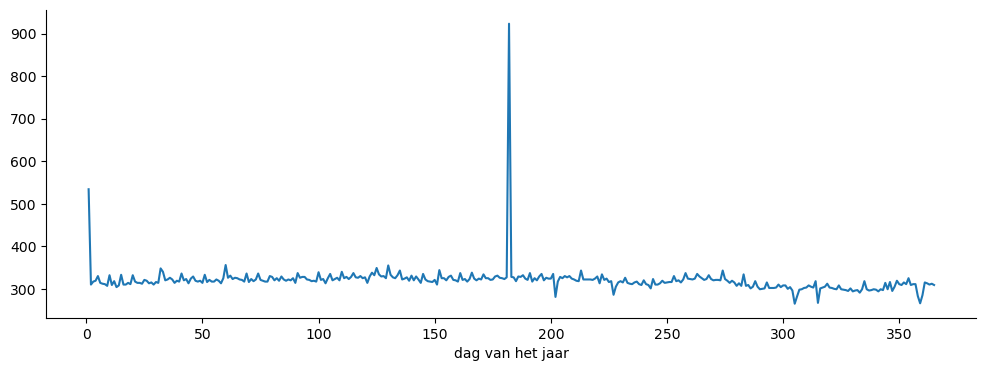

In [6]:
fig, ax = plt.subplots(figsize = (12,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


df_births_per_date = big_df.groupby('day_of_year').size().reset_index(name='aantal geboortes')

plt.xlabel("dag van het jaar")
plt.plot(df_births_per_date["day_of_year"], df_births_per_date["aantal geboortes"])



##

#### Vraag 2: Outliers vinden & behandelen

We klassificeren een datum als een outlier als het aantal geboortes meer dan `50%` afwijkt van de gemiddelde waarde overheen de volledige dataset. Zoek alle outliers in de dataset.

In [7]:
avg_aantal_geboortes = df_births_per_date["aantal geboortes"].mean()
onder_is_outlier = avg_aantal_geboortes / 2 
boven_is_outlier = avg_aantal_geboortes * 1.5

df_zonder_outliers = ( df_births_per_date[((df_births_per_date["aantal geboortes"] >= onder_is_outlier) & 
                                           (df_births_per_date["aantal geboortes"] <= boven_is_outlier))] ).copy()

df_met_outliers = ( df_births_per_date[((df_births_per_date["aantal geboortes"] <= onder_is_outlier) | 
                                           (df_births_per_date["aantal geboortes"] >= boven_is_outlier))] ).copy()

In [8]:
df_met_outliers

,day_of_year,aantal geboortes
0,1,534
181,182,923


Ik zal je vertellen; de outliers op 1 januari en 1 juli komen doordat alle geboortes waarvoor de datum niet correct genoteerd is, de datum 1 januari (voor de eerste helft van het jaar) en op 1 juli (voor de tweede helft van het jaar) geplaatst worden. Om dit op te lossen, halen we in de grote geboortes DataFrame (met 1 lijn per geboorte) deze twee datums er volledig uit. Dus we gaan **alle** geboortes van 1 januari en 1 juli verwijderen uit deze dataframe en toevoegen aan de `df_wrong` dataframe met als reden `2019-01-01` en `2019-07-01`.

In [9]:
for foute_dag in df_met_outliers["day_of_year"].unique() : 
    
    rows_to_remove = big_df[(big_df["day_of_year"] == foute_dag)].copy()
    rows_to_remove["error_reason"] = "hier moet ik nog de conversie maken naar het juiste formaat van de de foute dag"
    rows_to_remove = rows_to_remove.drop("day_of_year", axis=1)
    
    wrong_df = pd.concat([wrong_df, rows_to_remove], ignore_index=True)
    big_df = big_df[(big_df["day_of_year"] != foute_dag)]
        
    print(foute_dag)


1
182


In [10]:
wrong_df

,gemeente,naam,geslacht,verwachte datum,werkelijke_datum,error_reason
0,Kruisem,Patrick,Mannelijk,02/27/2019,2019-2-29,no valid birthday
1,Montigny-le-Tilleul,Sarah,Vrouwelijk,03/11/2019,2019-2-29,no valid birthday
2,Diepenbeek,Valentinus,Mannelijk,03/02/2019,2019-2-29,no valid birthday
3,Sint-Jans-Molenbeek,El,Mannelijk,02/27/2019,2019-2-29,no valid birthday
4,Overijse,Apolline,Vrouwelijk,03/03/2019,2019-2-29,no valid birthday
...,...,...,...,...,...,...
1525,Oostende,Magali,Vrouwelijk,07/15/2019,2019-7-1,hier moet ik nog de conversie maken naar het j...
1526,Rotselaar,Jean,Mannelijk,06/30/2019,2019-7-1,hier moet ik nog de conversie maken naar het j...
1527,Brussel,Lina,Vrouwelijk,07/11/2019,2019-7-1,hier moet ik nog de conversie maken naar het j...
1528,Hamont-Achel,Brenda,Vrouwelijk,06/25/2019,2019-7-1,hier moet ik nog de conversie maken naar het j...


Maak dezelfde plot nu opnieuw met het aantal geboortes per dag.

Text(0.5, 0, 'dag van het jaar')

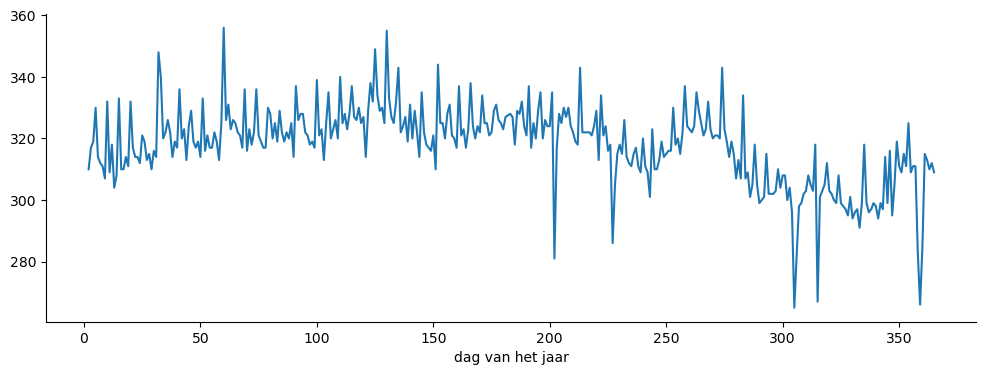

In [11]:
fig, ax = plt.subplots(figsize = (12,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(df_zonder_outliers["day_of_year"], df_zonder_outliers["aantal geboortes"])
plt.xlabel("dag van het jaar")

 We zien dat er nog steeds redelijk wat uitschieters zijn, kan je code schrijven om de 5 extreme uitschieters in de 2e helft van het jaar identificeren (in totaal 8 datums)?

In [13]:
# define outliers that are below a certain z score ... 



mean = df_zonder_outliers['aantal geboortes'].mean()
std_dev = df_zonder_outliers['aantal geboortes'].std()

# Calculate z-scores
df_zonder_outliers['z_score'] = (df_zonder_outliers['aantal geboortes'] - mean) / std_dev

# Identify outliers based on z-scores
df_outliers = df_zonder_outliers[df_zonder_outliers['z_score'] < - 2.5 ].copy()

In [14]:
df_outliers

,day_of_year,aantal geboortes,z_score
201,202,281,-2.910996
226,227,286,-2.516414
304,305,265,-4.173660
305,306,282,-2.832080
314,315,267,-4.015827
357,358,283,-2.753163
358,359,266,-4.094743
359,360,285,-2.595330


We zien dat er nog steeds redelijk wat uitschieters zijn, kan je code schrijven om de 5 extreme uitschieters in de 2e helft van het jaar identificeren (in totaal 8 datums)?

### Bonusvraag: wekelijkse verbanden

We zien vele pieken en dalen in de evolutie van het aantal geboortes. We willen deze grafiek graag iets "gladder" maken. Kan je hiervoor eens een visualizatie maken van het **gemiddeld** aantal geboortes per week (dit voor elke week, dus maandag-maandag, dinsdag-dinsdag, woensdag-woensdag, ...).

Text(0.5, 0, 'dag van het jaar')

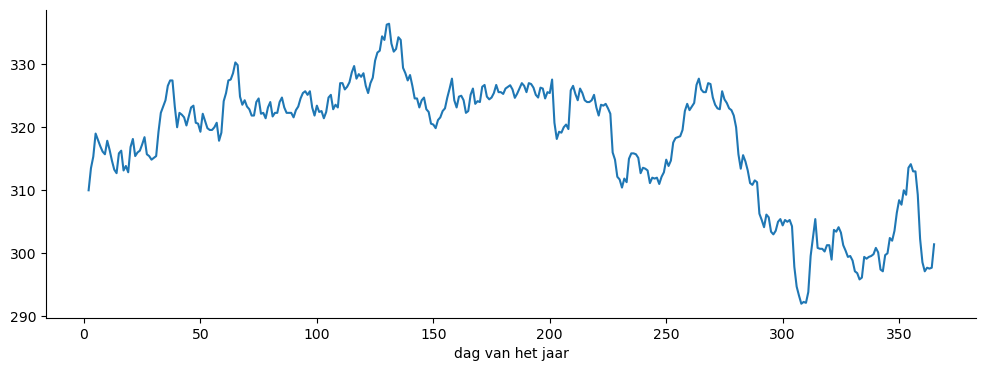

In [15]:
# first add the actual date 

# Function to construct the date
def construct_date(row):
    day_of_year = row['day_of_year']
    return datetime.datetime(2019, 1, 1) + datetime.timedelta(days=day_of_year - 1)

# Apply the function to construct the date for each row
df_zonder_outliers['geboorte datum'] = df_zonder_outliers.apply(lambda row: construct_date(row), axis=1)

# Set the 'date' column as the index
df_zonder_outliers.set_index('geboorte datum', inplace=True)

# Calculate the rolling 7-day average
df_zonder_outliers['rolling_avg_aantal_geboortes_7d'] = df_zonder_outliers['aantal geboortes'].rolling(window='7D').mean()



fig, ax = plt.subplots(figsize = (12,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(df_zonder_outliers["day_of_year"], df_zonder_outliers["rolling_avg_aantal_geboortes_7d"])
plt.xlabel("dag van het jaar")


Dat ziet er al een stuk mooier uit!  We zien ook een aantal duidelijk dips & pieken verschijnen die we eerder niet zagen. We kunnen nu ook even kijken naar het gemiddeld aantal geboortes per dag van de week! Misschien worden er wel gewoon veel minder mensen geboren op zondag dan een andere dag?

In [17]:
df_zonder_outliers = df_zonder_outliers.reset_index()
df_zonder_outliers['day_of_week'] = df_zonder_outliers['geboorte datum'].dt.day_name()

In [18]:
df_zonder_outliers

,geboorte datum,day_of_year,aantal geboortes,z_score,rolling_avg_aantal_geboortes_7d,day_of_week
0,2019-01-02,2,310,-0.622418,310.000000,Wednesday
1,2019-01-03,3,317,-0.070003,313.500000,Thursday
2,2019-01-04,4,319,0.087830,315.333333,Friday
3,2019-01-05,5,330,0.955911,319.000000,Saturday
4,2019-01-06,6,314,-0.306752,318.000000,Sunday
...,...,...,...,...,...,...
358,2019-12-27,361,315,-0.227836,297.142857,Friday
359,2019-12-28,362,313,-0.385669,297.714286,Saturday
360,2019-12-29,363,310,-0.622418,297.571429,Sunday
361,2019-12-30,364,312,-0.464585,297.714286,Monday


Text(0.5, 0, 'dag van het jaar')

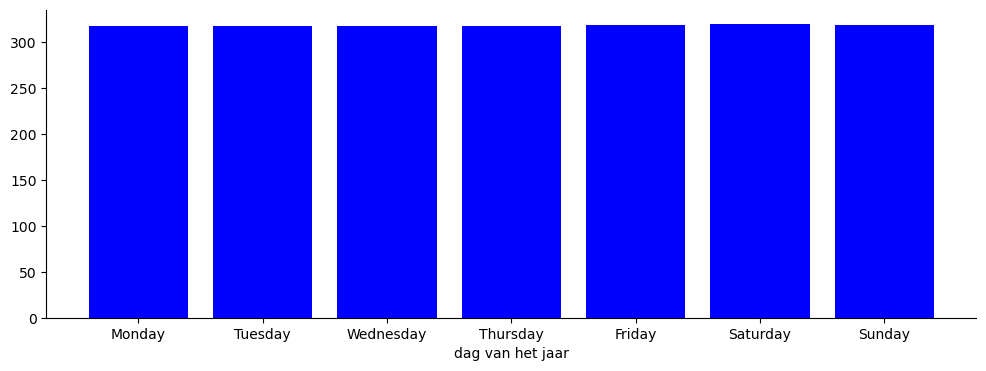

In [20]:
# Calculate average values for each weekday
average_geboortes_per_weekday = df_zonder_outliers.groupby('day_of_week')['aantal geboortes'].mean()

#volgorde terug goed krijgen 
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_geboortes_per_weekday = average_geboortes_per_weekday.reindex(custom_order)


fig, ax = plt.subplots(figsize = (12,4))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Plot the bar chart
plt.bar(average_geboortes_per_weekday.index, average_geboortes_per_weekday.values, color='blue')

plt.xlabel("dag van het jaar")